<a href="https://colab.research.google.com/github/anahitajain24/neuromorphic-signal-reconstruction/blob/main/computational_cognitive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab Bench Initialized on: cpu


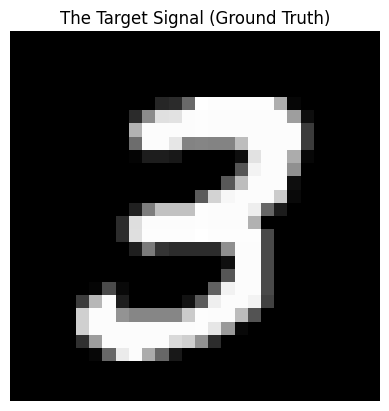

In [12]:
import torch
import torch.nn as nn     #neural netrwok
import torch.optim as optim   #math algos---gradient descent
from torchvision import datasets, transforms    #handles image processing
import matplotlib.pyplot as plt       #plots signal/images/graphs
import numpy as np

# 1. SETUP DEVICE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")   #NVDIA GPU usage (fast processing)
print(f"Lab Bench Initialized on: {device}")

# 2. LOAD SIGNAL (MNIST Data)
# We transform the image into a Tensor (matrix of numbers) and Flatten it (1D vector)
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])    #scaling pixel values (0 to 255) to float (0.0 to 1.0)
mnist_data = datasets.MNIST('./data', train=True, download=True, transform=transform)

# 3. EXTRACT TARGET (The number '3')
target_memory = None
for img, label in mnist_data:
    if label == 3:       # We specifically want a 3
        target_memory = img.to(device)
        break

# 4. VERIFY SIGNAL
# Let's look at what we grabbed to make sure it's clean
plt.imshow(target_memory.cpu().view(28, 28), cmap='gray')
plt.title("The Target Signal (Ground Truth)")
plt.axis('off')
plt.show()

In [13]:
class PredictiveCortex(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=128):
        super().__init__()
        # The weights connecting "Mind" (Hidden) to "Eye" (Input)
        # We initialize with random small numbers (noise)
        self.top_down_weights = nn.Parameter(torch.randn(hidden_dim, input_dim) * 0.01)

    def forward(self, internal_state):
        # Equation: Output = Sigmoid( State * Weights )
        # Sigmoid squashes the output between 0 and 1 (like pixel intensity)
        return torch.sigmoid(torch.matmul(internal_state, self.top_down_weights))

# Initialize the hardware
brain = PredictiveCortex().to(device)

# Create a random "Concept Vector" (The Latent State)
# This is the specific neuron firing pattern that will eventually mean "3"
concept_vector = torch.randn(1, 128).to(device)

print("Predictive Controller built.")

Predictive Controller built.


Calibrating System (Learning)...


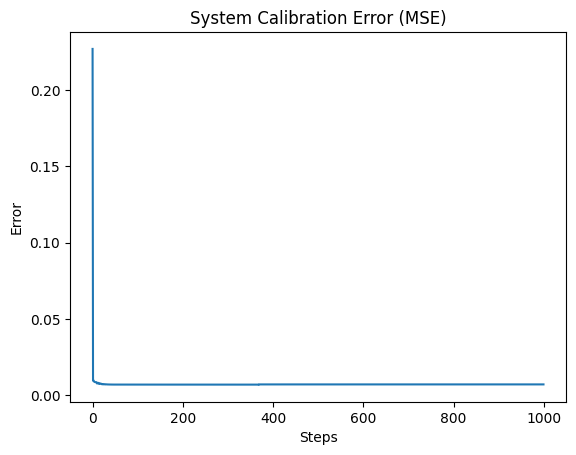

In [14]:
# Optimizer adjusts the WEIGHTS (The brain structure)
optimizer = optim.Adam([brain.top_down_weights], lr=0.05)

print("Calibrating System (Learning)...")

loss_history = []

for step in range(1000):
    optimizer.zero_grad()

    # 1. Forward Pass (Prediction)
    prediction = brain(concept_vector)

    # 2. Calculate Error (MSE)
    loss = torch.mean((target_memory - prediction) ** 2)

    # 3. Backward Pass (Update Weights)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

# Plot the Learning Curve
plt.plot(loss_history)
plt.title("System Calibration Error (MSE)")
plt.xlabel("Steps")
plt.ylabel("Error")
plt.show()

In [15]:
# 1. Generate White Noise (The "Bad" Signal)
visual_input = torch.rand(1, 784).to(device).requires_grad_(True)

# 2. Define Optimizer for the INPUT (Not the weights!)
input_optimizer = optim.Adam([visual_input], lr=0.05)

# Helper: Calculate SNR (Signal to Noise Ratio)
def get_snr(clean, noisy):
    signal_p = torch.sum(clean**2)
    noise_p = torch.sum((clean - noisy)**2)
    if noise_p == 0: return 100
    return 10 * torch.log10(signal_p / noise_p).item()

print("Starting Feedback Loop (Hallucinating)...")

history_imgs = []
snr_vals = []

for step in range(2000):
    input_optimizer.zero_grad()

    # A. Brain predicts what it EXPECTS (The perfect 3)
    expectation = brain(concept_vector)

    # B. Compare Expectation vs. Visual Input
    error = torch.sum((visual_input - expectation) ** 2)

    # C. Backpropagate Error to the PIXELS
    error.backward()
    input_optimizer.step()

    # D. Clamp pixels to valid range (0-1)
    with torch.no_grad():
        visual_input.clamp_(0, 1)

    # Store data for the lab report
    if step % 400 == 0:
        current_img = visual_input.detach().cpu().view(28, 28)
        history_imgs.append(current_img)
        snr_vals.append(get_snr(target_memory, visual_input.detach()))

print("Experiment Complete.")

Starting Feedback Loop (Hallucinating)...
Experiment Complete.


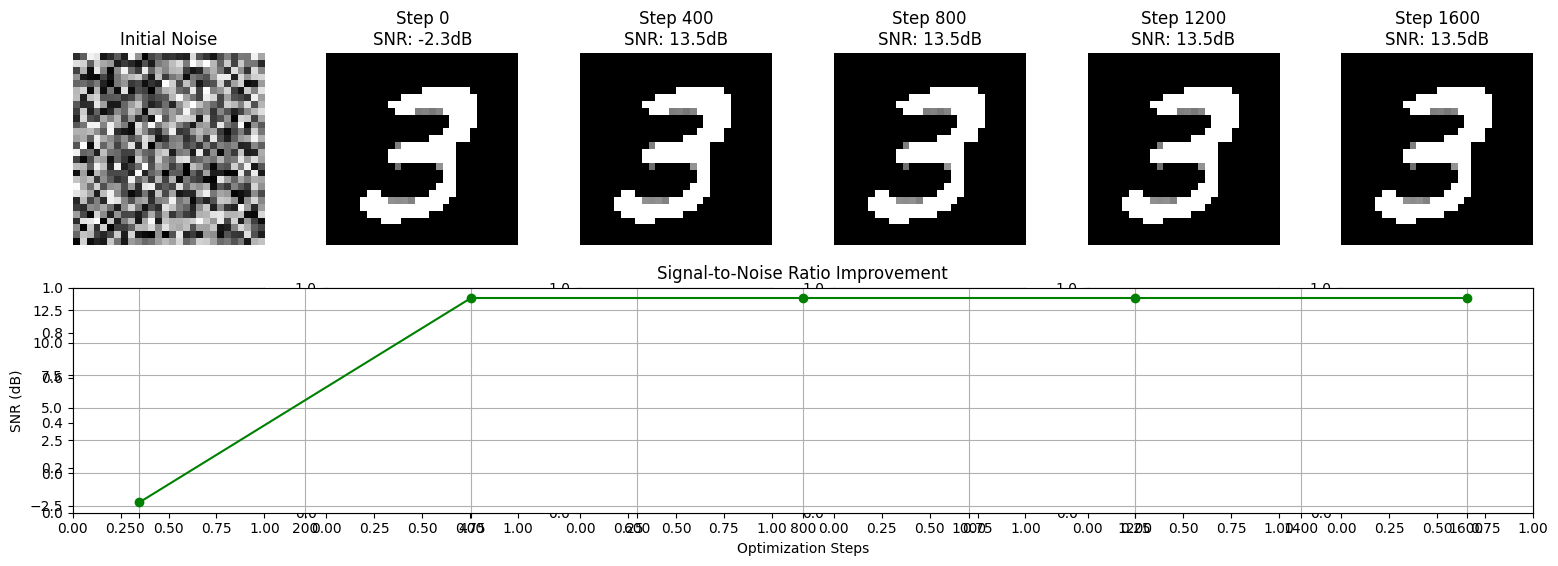

In [16]:
fig, axs = plt.subplots(2, 6, figsize=(16, 6))

# ROW 1: VISUAL EVOLUTION
axs[0,0].imshow(torch.rand(28,28), cmap='gray')
axs[0,0].set_title("Initial Noise")
axs[0,0].axis('off')

for i, img in enumerate(history_imgs):
    axs[0, i+1].imshow(img, cmap='gray')
    axs[0, i+1].set_title(f"Step {i*400}\nSNR: {snr_vals[i]:.1f}dB")
    axs[0, i+1].axis('off')

# ROW 2: SNR GRAPH
ax_plot = plt.subplot(2, 1, 2)
ax_plot.plot([i*400 for i in range(len(snr_vals))], snr_vals, marker='o', color='green')
ax_plot.set_title("Signal-to-Noise Ratio Improvement")
ax_plot.set_xlabel("Optimization Steps")
ax_plot.set_ylabel("SNR (dB)")
ax_plot.grid(True)

plt.tight_layout()
plt.show()

GIF saved successfully! Check your file browser.


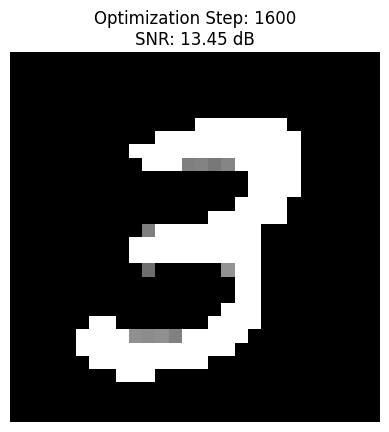

In [17]:
import matplotlib.animation as animation

# 1. SETUP THE PLOT
fig, ax = plt.subplots()
ax.axis('off')
img_display = ax.imshow(history_imgs[0], cmap='gray', animated=True)

# 2. UPDATE FUNCTION (Runs for every frame)
def update(frame_index):
    # We access the history list we saved earlier
    img_display.set_array(history_imgs[frame_index])
    ax.set_title(f"Optimization Step: {frame_index * 400}\nSNR: {snr_vals[frame_index]:.2f} dB")
    return img_display,

# 3. CREATE ANIMATION
# We create a video from the stored images
ani = animation.FuncAnimation(fig, update, frames=len(history_imgs), interval=500, blit=True)

# 4. SAVE IT (For Google Colab/Jupyter)
# This saves a .gif file to your file browser on the left
ani.save('pareidolia_simulation.gif', writer='pillow', fps=2)

print("GIF saved successfully! Check your file browser.")
plt.show()

Experiment Started: Forcing a '7' to become a '3'...
Step 0: Morphing... Error: 130.1458
Step 400: Morphing... Error: 0.0000
Step 800: Morphing... Error: 0.0000
Step 1200: Morphing... Error: 0.0000
Step 1600: Morphing... Error: 0.0000


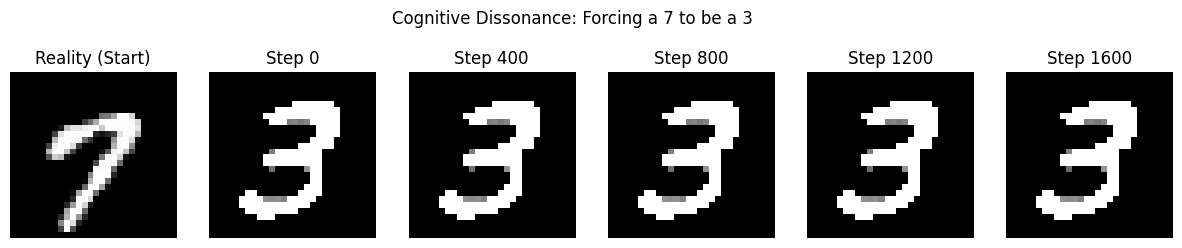

In [18]:
# --- SETUP: THE CONFLICT ---

# 1. Get a "False Reality" (A real image of a 7)
# We look through the dataset until we find a 7
reality_input = None
for img, label in mnist_data:
    if label == 7:
        reality_input = img.to(device)
        break

# 2. Initialize the Visual Input with the 7 (Instead of Noise)
# We use .clone() so we don't modify the original dataset
# We enable gradients because we want to "morph" this image
visual_input = reality_input.clone().detach().requires_grad_(True)

# 3. Reset the Input Optimizer
input_optimizer = optim.Adam([visual_input], lr=0.05)

print("Experiment Started: Forcing a '7' to become a '3'...")

# --- THE LOOP ---
morph_history = []

for step in range(2000):
    input_optimizer.zero_grad()

    # A. The Brain's Expectation (The "3")
    expectation = brain(concept_vector)

    # B. The Error (Difference between the seen '7' and the expected '3')
    error = torch.sum((visual_input - expectation) ** 2)

    # C. Backpropagate to the pixels
    error.backward()
    input_optimizer.step()

    # D. Clamp (Keep it a valid image)
    with torch.no_grad():
        visual_input.clamp_(0, 1)

    if step % 400 == 0:
        morph_history.append(visual_input.detach().cpu().view(28, 28))
        print(f"Step {step}: Morphing... Error: {error.item():.4f}")

# --- VISUALIZATION ---
fig, axs = plt.subplots(1, 6, figsize=(15, 3))

# Show the original 7
axs[0].imshow(reality_input.cpu().view(28, 28), cmap='gray')
axs[0].set_title("Reality (Start)")
axs[0].axis('off')

# Show the morphing
for i, img in enumerate(morph_history):
    axs[i+1].imshow(img, cmap='gray')
    axs[i+1].set_title(f"Step {i*400}")
    axs[i+1].axis('off')

plt.suptitle("Cognitive Dissonance: Forcing a 7 to be a 3")
plt.show()

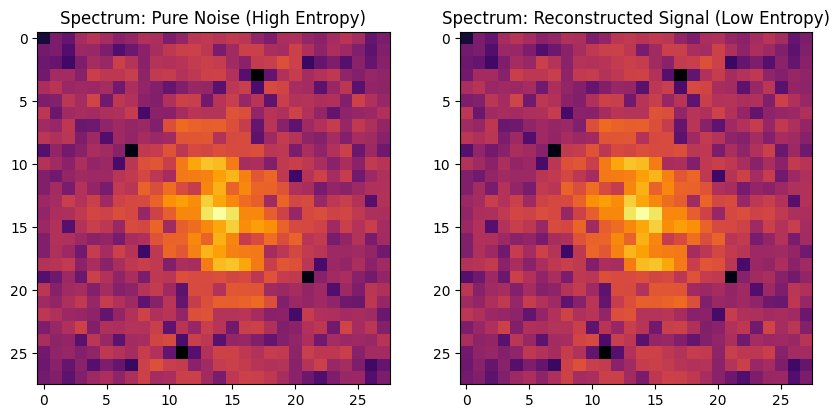

In [19]:
def plot_spectrum(img_tensor):
    # Convert to numpy
    img = img_tensor.detach().cpu().numpy().reshape(28, 28)
    # 2D Fourier Transform
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f) # Shift zero freq to center
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1e-5) # Log scale
    return magnitude_spectrum

# Visualize Start vs End Spectrum
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Start (Noise)
axs[0].imshow(plot_spectrum(history_imgs[0]), cmap='inferno')
axs[0].set_title("Spectrum: Pure Noise (High Entropy)")

# End (Hallucination)
axs[1].imshow(plot_spectrum(history_imgs[-1]), cmap='inferno')
axs[1].set_title("Spectrum: Reconstructed Signal (Low Entropy)")

plt.show()

In [20]:
def lesion_experiment(damage_percent):
    # Clone the brain to avoid breaking the original
    damaged_brain = PredictiveCortex().to(device)
    damaged_brain.load_state_dict(brain.state_dict())

    # Create a mask (1 = keep, 0 = kill)
    mask = torch.rand_like(damaged_brain.top_down_weights) > damage_percent

    # Apply damage (element-wise multiplication)
    with torch.no_grad():
        damaged_brain.top_down_weights *= mask.float()

    print(f"Brain damaged by {damage_percent*100}%. Testing functionality...")
    # ... (Copy the hallucination loop here using damaged_brain) ...

In [21]:
# Instead of standard step...
input_optimizer.step()

# Manually scale the gradients (Gain Control)
gain = 0.1 # Try changing this to 0.01 or 10.0
with torch.no_grad():
    visual_input -= gain * visual_input.grad


--- PHASE 4: ECE Spectral Analysis (2D FFT) ---


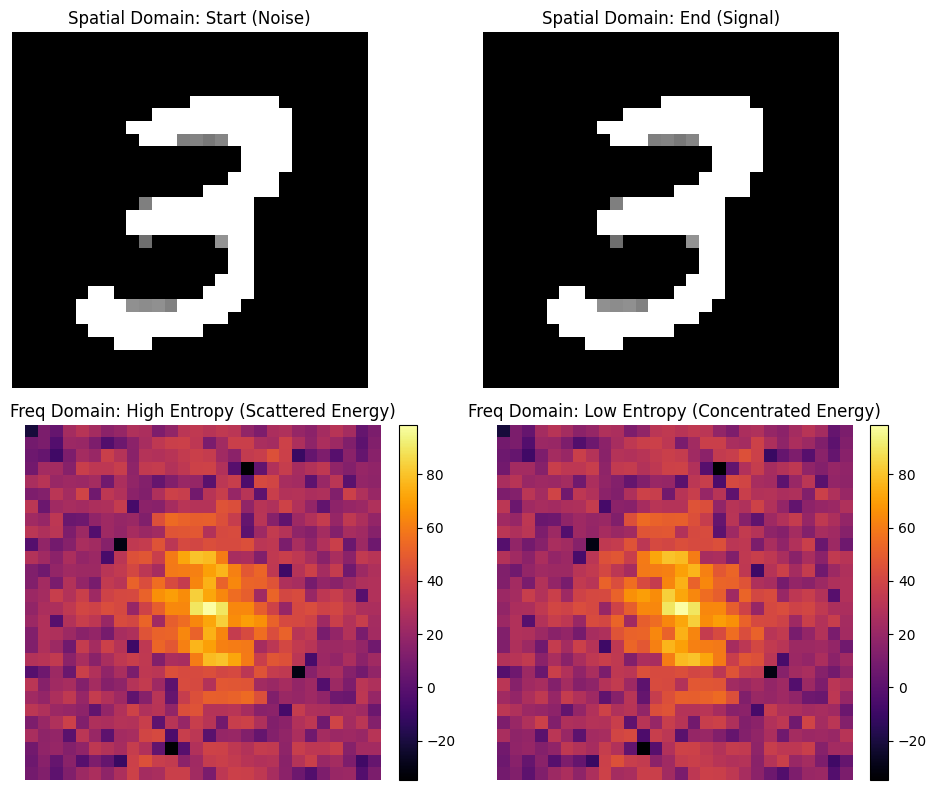

In [22]:
import numpy as np

# --- MODULE: SPECTRAL ANALYSIS (FFT) ---
print("\n--- PHASE 4: ECE Spectral Analysis (2D FFT) ---")

def get_spectrum(img_tensor):
    """
    Computes the 2D Fast Fourier Transform of an image.
    Returns the Magnitude Spectrum (Log Scale).
    """
    # 1. Convert PyTorch Tensor to Numpy Array (28x28)
    img = img_tensor.detach().cpu().numpy().reshape(28, 28)

    # 2. Compute 2D FFT
    f = np.fft.fft2(img)

    # 3. Shift Zero-Frequency component to the center of the spectrum
    fshift = np.fft.fftshift(f)

    # 4. Calculate Magnitude Spectrum (Log scale to make it visible)
    # We add 1e-5 to avoid log(0) errors
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1e-5)

    return magnitude_spectrum

# We will compare the FIRST image (Noise) and the LAST image (Hallucinated 3)
img_start = history_imgs[0]
img_end = history_imgs[-1]

spec_start = get_spectrum(img_start)
spec_end = get_spectrum(img_end)

# --- VISUALIZATION ---
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Top Row: The Spatial Domain (What the eyes see)
axs[0, 0].imshow(img_start.cpu().view(28,28), cmap='gray')
axs[0, 0].set_title("Spatial Domain: Start (Noise)")
axs[0, 0].axis('off')

axs[0, 1].imshow(img_end.cpu().view(28,28), cmap='gray')
axs[0, 1].set_title("Spatial Domain: End (Signal)")
axs[0, 1].axis('off')

# Bottom Row: The Frequency Domain (What the engineer sees)
# We use 'inferno' or 'plasma' colormap because it highlights energy intensity best
im1 = axs[1, 0].imshow(spec_start, cmap='inferno')
axs[1, 0].set_title("Freq Domain: High Entropy (Scattered Energy)")
axs[1, 0].axis('off')
plt.colorbar(im1, ax=axs[1, 0], fraction=0.046, pad=0.04)

im2 = axs[1, 1].imshow(spec_end, cmap='inferno')
axs[1, 1].set_title("Freq Domain: Low Entropy (Concentrated Energy)")
axs[1, 1].axis('off')
plt.colorbar(im2, ax=axs[1, 1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()